In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [4]:
import os

if not os.getcwd().endswith('lab1'):
    os.chdir('./lab1')

### Data loading

In [5]:
df = pd.read_csv('./data/nyt-frame.csv', header=0)
data = df.iloc[:,9:]
array = data.values

In [6]:
df

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Example column names

In [7]:
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['moreover' 'contemporary' 'chief' 'english' 'less' 'finances' 'homer'
 'cheered' 'squid' 'months' 'remarks' 'kind' 'alternative' 'anyone'
 'getting' 'vaguely' 'counter' 'and' 'audacity' 'border']


### PCA transformation

In [8]:
pca = PCA(svd_solver='arpack')
X_pca = pca.fit_transform(array)

#### 1st PCA component

In [9]:
indexes_sorted = np.argsort(pca.components_[0])

15 elements with the higest value

In [10]:
print(*np.array(header)[indexes_sorted[-15:]], sep='\n')

me
he
mrs
im
paintings
process
painting
my
cooper
mother
said
i
ms
her
she


15 elements with the lowest value

In [11]:
print(*np.array(header)[indexes_sorted[:15]], sep='\n')

music
trio
theater
orchestra
composers
opera
theaters
m
program
players
festival
east
y
jersey
symphony


#### 2nd PCA component

In [12]:
indexes_sorted2 = np.argsort(pca.components_[1])

15 elements with the higest value

In [13]:
print(*np.array(header)[indexes_sorted2[-15:]], sep='\n')

vocal
orchestra
songs
musical
music
festival
production
sang
hour
i
ms
opera
theater
she
her


15 elements with the lowest value

In [14]:
print(*np.array(header)[indexes_sorted2[:15]], sep='\n')

art
museum
images
artists
donations
museums
painting
tax
paintings
sculpture
gallery
sculptures
painted
white
service


### Visualization for main components

#### 2 main components with 2 classes (art and music)

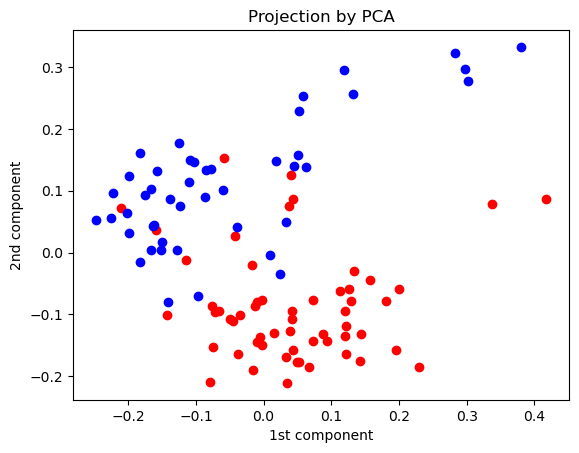

In [15]:
import matplotlib.pyplot as plt

reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

#### Variance ratio 

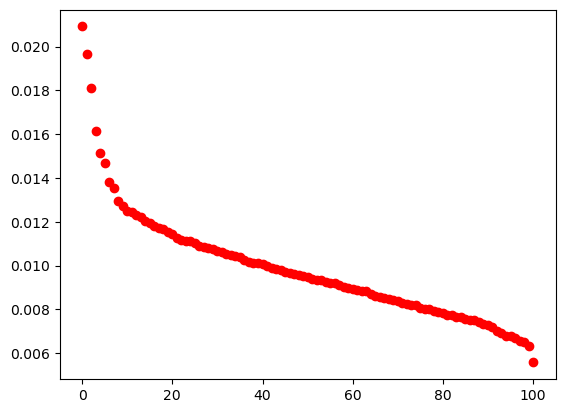

0.15773478029003488


In [20]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))